Семенова Майя Валериевна

Домашнее задание 2. Пример визуального анализа данных по оттоку клиентов телеком-оператора. 
Провести визуальный анализ данных по аналогии с Lesson2_1.
Вам необходимо поместить в основной каталог юпитера этот файл и файл с данными telecom_churn.csv.
В пустые ячейки необходимо ввести код программы, ввыполнить его и получить результат в соответствии с заданием.
После выполнения всех заданий, дополнительно, сохраняем тетрадь юпитера в pdf формате.
Для этого шелкаем правой кнопкой и в меню выбираем "Сохранить страницу как", вводим имя файла и выбираем формат pdf.
Отчет будет включать два файла.
Файл юпитера для проверки.
Файл в формате pdf для цифрового следа.

In [19]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Загрузка данных

In [20]:
df = pd.read_csv('telecom_churn.csv')
print(df.shape)

(3333, 20)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


Есть нулевые объекты. Оставляем только ненулевые.

In [22]:
df = df.dropna()

In [23]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


(3333, 20)

In [24]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
df['Churn'] = df['Churn'].astype('int64')

In [26]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [27]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [28]:
df.columns = df.columns.str.replace(' ', '_')

In [29]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

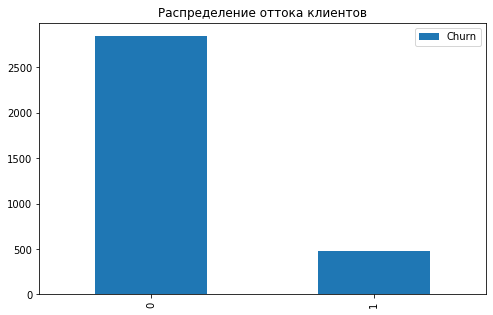

In [30]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов');

Оставим только те признаки, которые мы будем в дальнейшем использовать. Выводим "голову" полученного файла

In [35]:
useful_cols = ['Account_length', 'Number_vmail_messages', 'Total_day_minutes', 'Total_day_calls', 
               'Total_day_charge', 'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge', 
               'Total_night_minutes', 'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
               'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls', 'Churn'
              ]
df[useful_cols].head()

,Account_length,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Строим пример графика для нескольких параметров

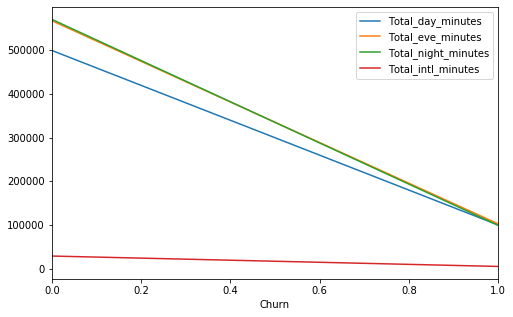

In [41]:
min_df = df[[x for x in df.columns if 'minutes' in x] + ['Churn']]
min_df.groupby('Churn').sum().plot();

Строим пример гистограммы для нескольких параметров

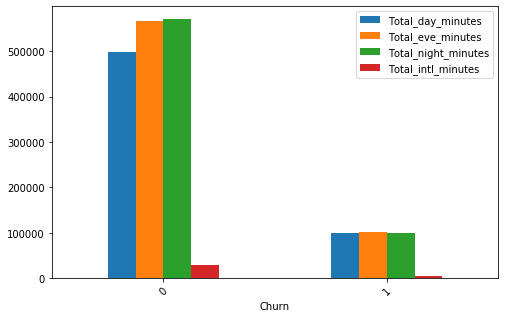

In [44]:
min_df.groupby('Churn').sum().plot(kind='bar', rot=45)

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные scatter plots(диаграммы рассеяния) для соответствующих пар признаков.

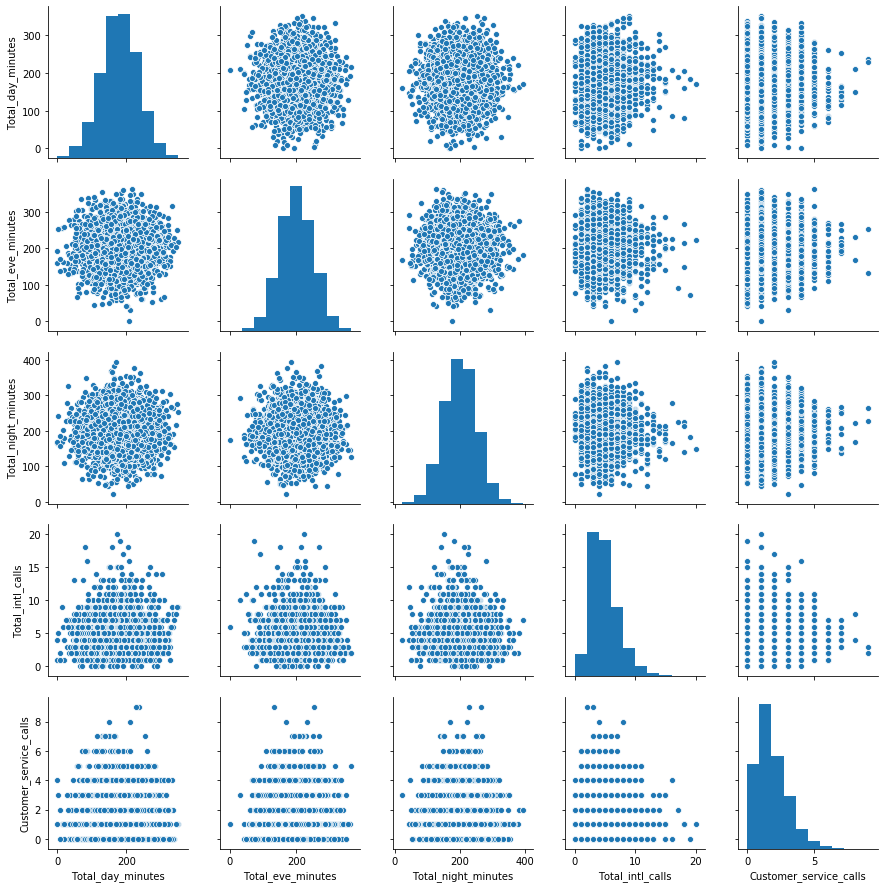

In [45]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Total_day_minutes', 'Total_eve_minutes', 'Total_night_minutes', 
                 'Total_intl_calls', 'Customer_service_calls']])

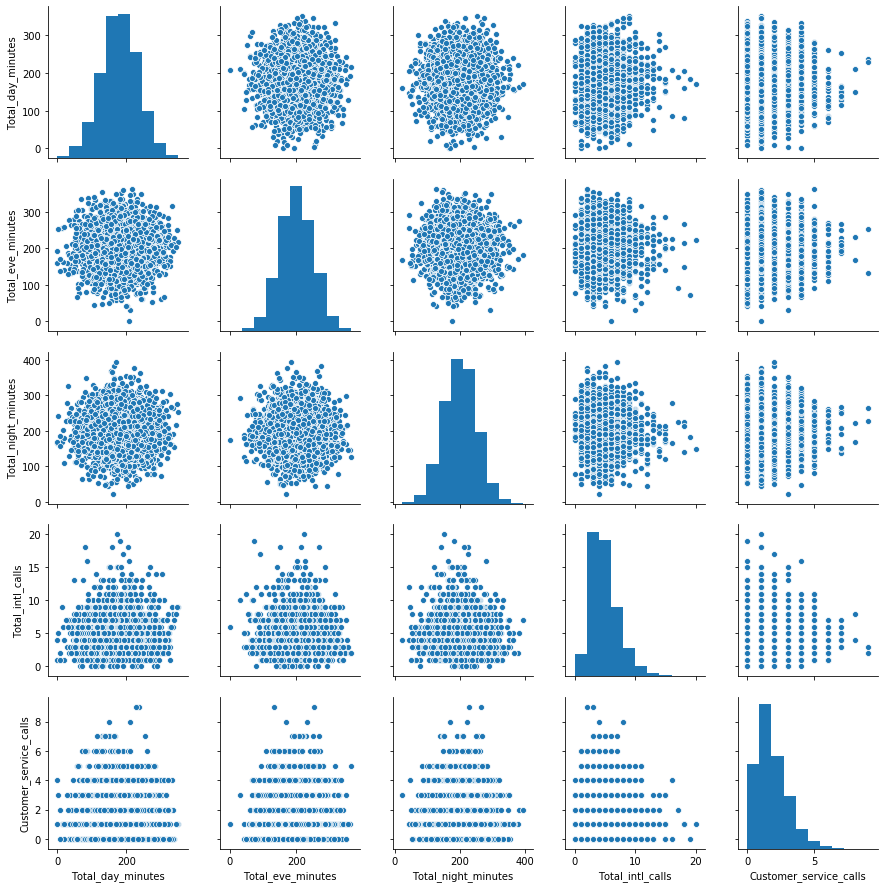

In [46]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Total_day_minutes', 'Total_eve_minutes', 'Total_night_minutes', 
                 'Total_intl_calls', 'Customer_service_calls']]).savefig('Fig1')

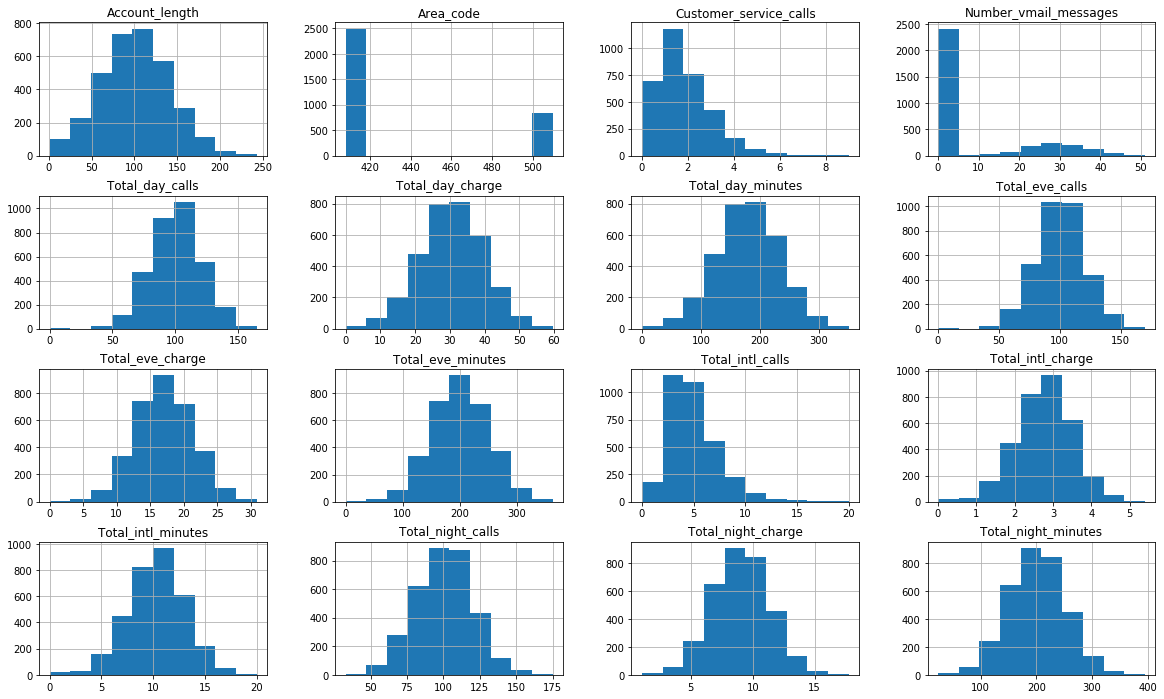

In [48]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));

Ядерная оценка плотности 

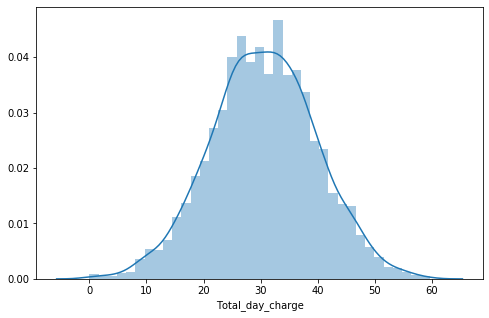

In [49]:
sns.distplot(df.Total_day_charge)

joint plot — это гибрид scatter plot и histogram.

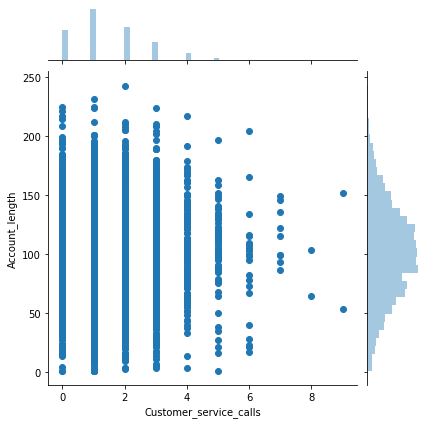

In [53]:
sns.jointplot(x='Customer_service_calls', y='Account_length', 
              data=df, kind='scatter')

In [54]:
df[df['Churn'] == 1].mean()

Account_length            102.664596
Area_code                 437.817805
Number_vmail_messages       5.115942
Total_day_minutes         206.914079
Total_day_calls           101.335404
Total_day_charge           35.175921
Total_eve_minutes         212.410145
Total_eve_calls           100.561077
Total_eve_charge           18.054969
Total_night_minutes       205.231677
Total_night_calls         100.399586
Total_night_charge          9.235528
Total_intl_minutes         10.700000
Total_intl_calls            4.163561
Total_intl_charge           2.889545
Customer_service_calls      2.229814
Churn                       1.000000
dtype: float64

Визуализируем длительность обслуживания клиента в зависимости от штата

In [70]:
account = df.pivot_table(
                        index='State', 
                        columns='Account_length', 
                        values='Total_day_charge', 
                        aggfunc=sum).fillna(0).applymap(float)

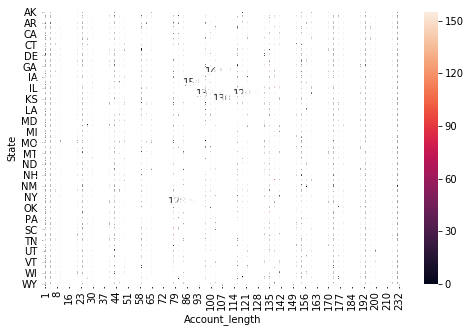

In [71]:
sns.heatmap(account, annot=True, fmt=".1f", linewidths=.5)

Библиотека plotly(интерактивная графика). Импортируем все необходимые модули и инициализируем plotly с помощью команды init_notebook_mode

In [72]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

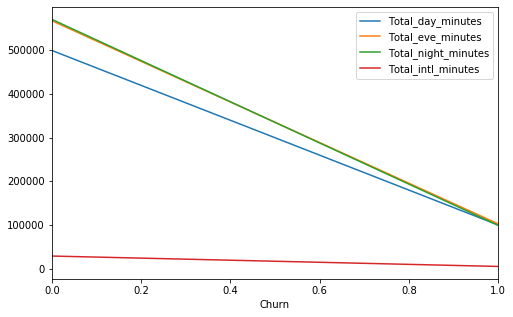

In [73]:
min_df = df[[x for x in df.columns if 'minutes' in x] + ['Churn']]
min_df.groupby('Churn').sum().plot();

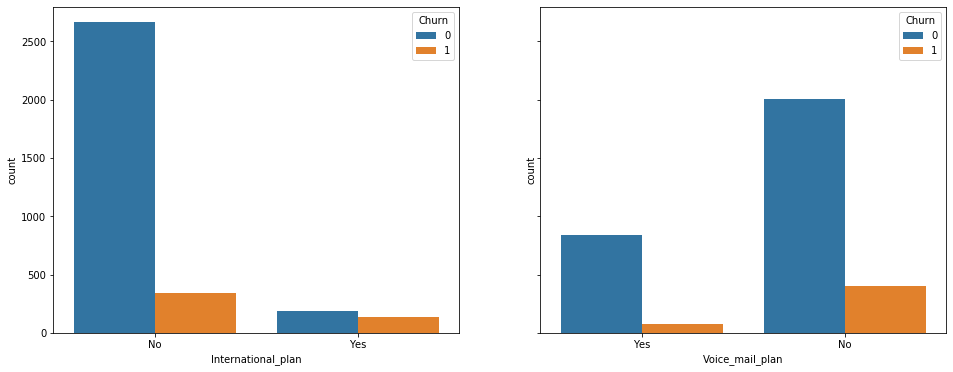

In [82]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='International_plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice_mail_plan', hue='Churn', data=df, ax=axes[1]);

Можно сразу сохранить график в виде html-файла.

'file://C:\\Users\\dashk\\Lesson2\\years_stats.html'